In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sample volume thickness
t = 0.001 # m
# Radius of sphere, equal to 1 um but expressed in AA
R = 10000e-10 # m
# Volume ratio
phi = 0.015
delta_rho = 6e10 * (1e2) ** 2 # 1/m^2 (?)

In [3]:
wavelength = 2.165e-10 # m
s_t = 3/2 * phi * (1 - phi) * delta_rho**2 * wavelength**2 * t * R
s_t

0.373970246625

In [4]:
def G_0(xi):
    res = np.zeros_like(xi)
    res[xi>=2.0] = 0
    valid_xi = xi[xi<2.0]
    res[xi<2.0] = np.sqrt(1 - (valid_xi/2)**2)*(1 + valid_xi**2/8) + 1/2 * valid_xi ** 2 * (1 - (valid_xi/4)**2) * np.log(valid_xi/(2+np.sqrt(4 - valid_xi**2)))
    return res
def G(xi):
    return s_t * G_0(xi)

/tmp/ipykernel_29118/2774339107.py:5: RuntimeWarning: divide by zero encountered in log
  res[xi<2.0] = np.sqrt(1 - (valid_xi/2)**2)*(1 + valid_xi**2/8) + 1/2 * valid_xi ** 2 * (1 - (valid_xi/4)**2) * np.log(valid_xi/(2+np.sqrt(4 - valid_xi**2)))
/tmp/ipykernel_29118/2774339107.py:5: RuntimeWarning: invalid value encountered in multiply
  res[xi<2.0] = np.sqrt(1 - (valid_xi/2)**2)*(1 + valid_xi**2/8) + 1/2 * valid_xi ** 2 * (1 - (valid_xi/4)**2) * np.log(valid_xi/(2+np.sqrt(4 - valid_xi**2)))


Text(0, 0.5, 'G(z)')

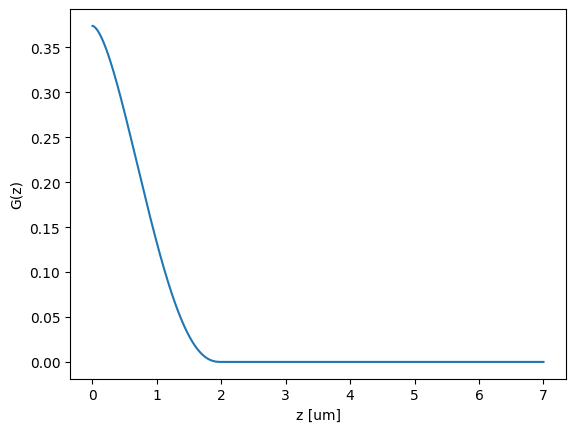

In [5]:
z = np.linspace(0,7 * R,1000)
xi = z / R
G_xi = G(xi)

plt.plot(z*1e6,G_xi)
plt.xlabel('z [um]')
plt.ylabel('G(z)')

Text(0, 0.5, 'R(z)')

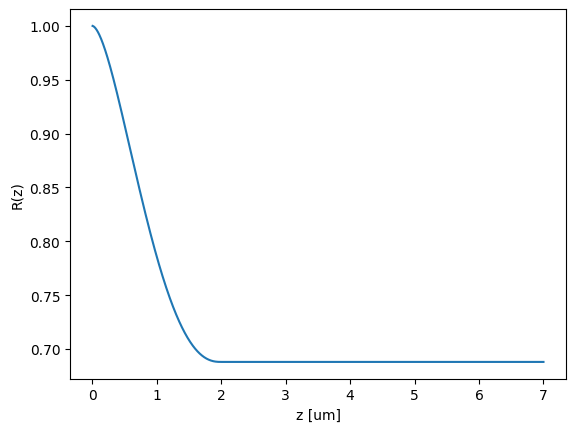

In [6]:
R = np.exp(G_xi - s_t)
plt.plot(z*1e6,R)
plt.xlabel('z [um]')
plt.ylabel('R(z)')

# Simulation fit and analytical $R(z)$ comparison

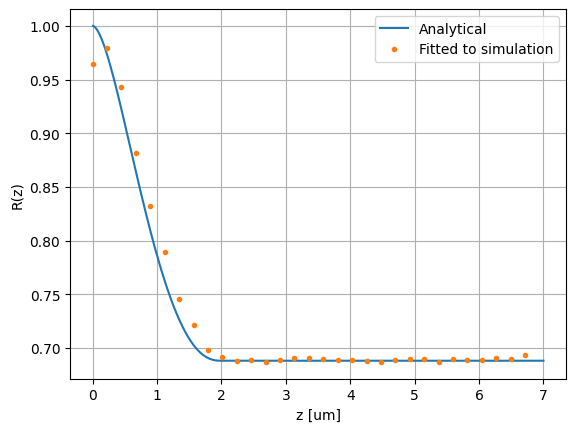

In [10]:
z_sim, R_sim = np.genfromtxt(f'simulation-fit.txt', delimiter=',',usecols=(0,1),unpack=True)

plt.plot(z*1e6,R, label='Analytical')
plt.plot(z_sim*1e6,R_sim,'.', label='Fitted to simulation')
plt.xlabel('z [um]')
plt.ylabel('R(z)')
plt.legend()
plt.grid()